# Develop an initial model and split datasets

In [146]:
from fastai import *
import pandas as pd
from pathlib import Path
import torch
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.vision.all import *

In [16]:
data_path = Path('../../data')

In [32]:
path = Path(data_path/"processed")

In [36]:
labels = ('call', 'nocall')

In [41]:
filenames = get_image_files(path)
filenames

(#1998) [Path('../../data/processed/call/spectrograms/recording-6714-clip-90536.png'),Path('../../data/processed/call/spectrograms/recording-529966-clip-977059.png'),Path('../../data/processed/call/spectrograms/recording-100760-clip-422149.png'),Path('../../data/processed/call/spectrograms/recording-100226-clip-362208.png'),Path('../../data/processed/call/spectrograms/recording-320901-clip-731347.png'),Path('../../data/processed/call/spectrograms/recording-248819-clip-952672.png'),Path('../../data/processed/call/spectrograms/recording-552380-clip-645239.png'),Path('../../data/processed/call/spectrograms/recording-292199-clip-569065.png'),Path('../../data/processed/call/spectrograms/recording-217279-clip-755445.png'),Path('../../data/processed/call/spectrograms/recording-100144-clip-349271.png')...]

In [126]:
def grandparent_label(o):
    "Label `item` with the parent folder name."
    return Path(o).parent.parent.name

In [153]:
time_tfms = [Zoom(p=1., draw=1.5, draw_y=1)]

In [170]:
birds = DataBlock(
    blocks = (ImageBlock, CategoryBlock), 
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2),
    get_y = grandparent_label)

In [171]:
dataloaders = birds.dataloaders(path)

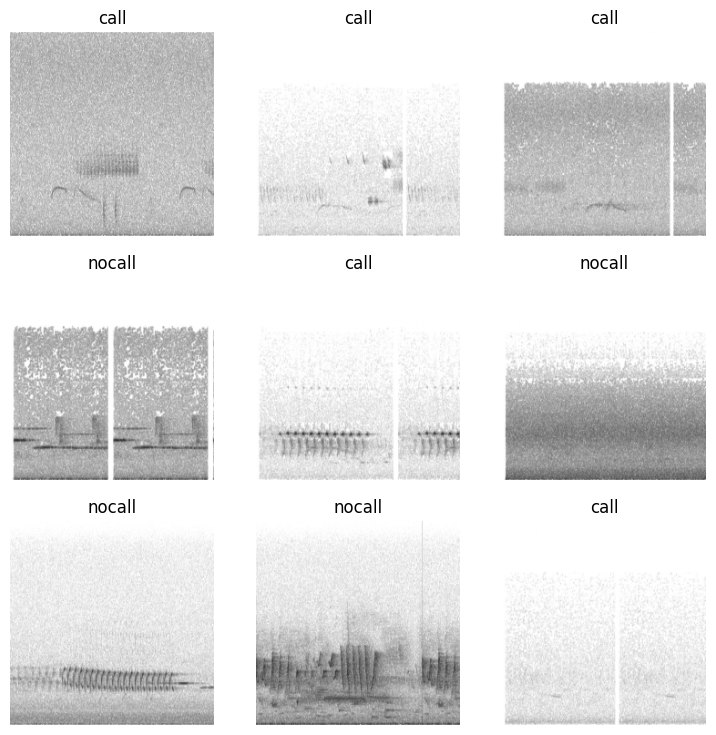

In [172]:
dataloaders.train.show_batch(unique=False)

In [173]:
learn = vision_learner(dataloaders, resnet18, metrics=error_rate)

In [174]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time


TypeError: Exception occured in `ProgressCallback` when calling event `after_batch`:
	unsupported format string passed to TensorBase.__format__